In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer
plt.style.use('seaborn-v0_8')


In [2]:
# Load the CSV in the same folder
data = pd.read_csv('covid_19_clean_complete.csv')

# View first rows
data.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [3]:
# Check column names & missing values
print(data.info())
print("\nMissing values per column:\n", data.isnull().sum())

# Fill missing values with 0 (simple)
data.fillna(0, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB
None

Missing values per column:
 Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64


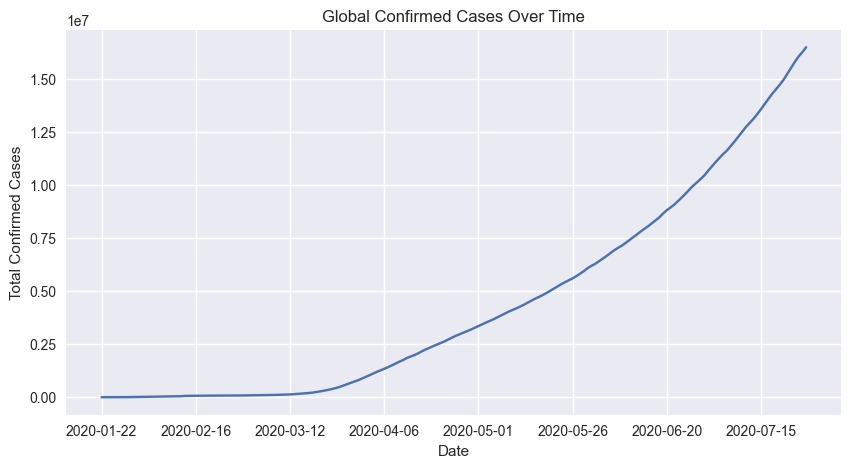

In [4]:
# Group by date and sum confirmed cases
cases_over_time = data.groupby('Date')['Confirmed'].sum()

plt.figure(figsize=(10,5))
cases_over_time.plot()
plt.title('Global Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.show()


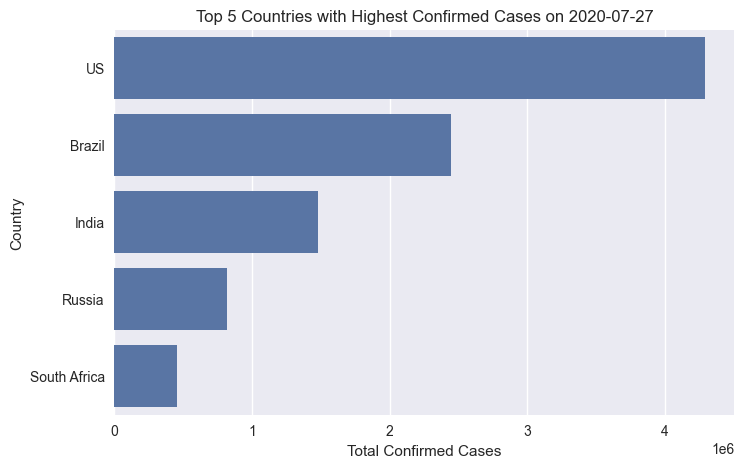

In [5]:
latest_date = data['Date'].max()
latest = data[data['Date'] == latest_date]

top5 = latest.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=top5.values, y=top5.index)
plt.title(f'Top 5 Countries with Highest Confirmed Cases on {latest_date}')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Country')
plt.show()


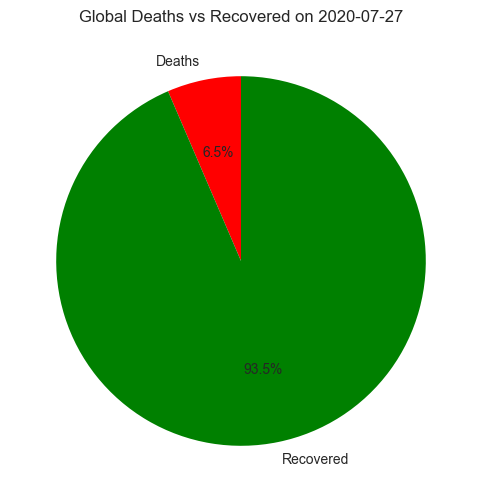

In [6]:
total_deaths = latest['Deaths'].sum()
total_recovered = latest['Recovered'].sum()

plt.figure(figsize=(6,6))
plt.pie([total_deaths, total_recovered],
        labels=['Deaths','Recovered'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['red','green'])
plt.title(f'Global Deaths vs Recovered on {latest_date}')
plt.show()


### Conclusion
- The top 5 countries by confirmed cases are shown above.
- Globally, confirmed cases increased over time.
- Recovery numbers are larger than deaths in the latest data.
